# [TEMPLATE] DATASET DEPURADO

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [53]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [54]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [55]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [56]:
df2 = df.loc[(~df['piscina'].isnull()) & (~df['gimnasio'].isnull())].copy()
cant_con_piscina_o_gimnasio = len(df2.loc[(df2['piscina']== True) | (df2['gimnasio']==True)])

In [57]:
ids_con_piscina = set(df2.loc[df2['piscina'] == True].id)

In [58]:
ids_con_gimnasio = set(df2.loc[df2['gimnasio'] == True].id)

In [59]:
porcentaje_con_piscina = int(100*len(ids_con_piscina)/cant_con_piscina_o_gimnasio)
porcentaje_con_gimnasio = int(100*len(ids_con_gimnasio)/cant_con_piscina_o_gimnasio)

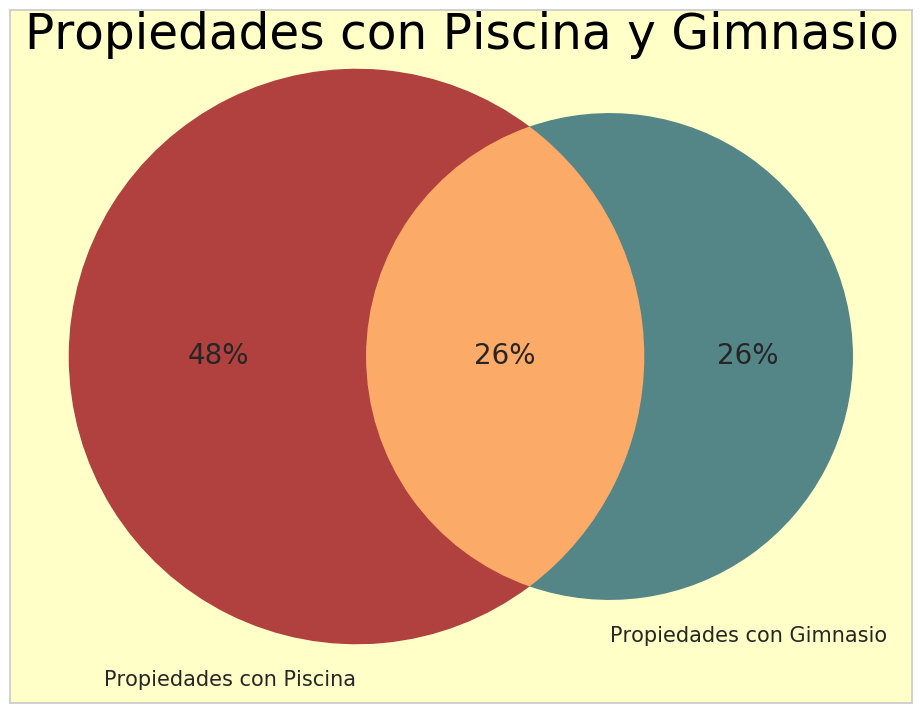

In [66]:
plt.figure(figsize=(18, 9))
g = venn2([ids_con_piscina,ids_con_gimnasio],set_labels=('A','B'),alpha=1)
plt.text(0,0.5,'Propiedades con Piscina y Gimnasio', ha='center', va='bottom', size=35, color='#000000' )
plt.gca().set_facecolor('#FFFFC7')
plt.gca().set_axis_on()
g.get_label_by_id('A').set_text("Propiedades con Piscina")
g.get_label_by_id('B').set_text("Propiedades con Gimnasio")
g.get_label_by_id('A').set_size(15)
g.get_label_by_id('B').set_size(15)

g.get_patch_by_id('10').set_alpha(1.0)
g.get_patch_by_id('10').set_color('#B0413E')
porcentaje10 = int(round(100*float(g.get_label_by_id('10').get_text())/cant_con_piscina_o_gimnasio))
g.get_label_by_id('10').set_text(f"{porcentaje10}%")
g.get_label_by_id('10').set_size(20)

g.get_patch_by_id('01').set_alpha(1.0)
g.get_patch_by_id('01').set_color('#548687')
porcentaje01 = int(round(100*float(g.get_label_by_id('01').get_text())/cant_con_piscina_o_gimnasio))-1
g.get_label_by_id('01').set_text(f"{porcentaje01}%")
g.get_label_by_id('01').set_size(20)

g.get_patch_by_id('11').set_alpha(1.0)
g.get_patch_by_id('11').set_color('#FCAA67')
porcentaje11 = int(round(100*float(g.get_label_by_id('11').get_text())/cant_con_piscina_o_gimnasio))
g.get_label_by_id('11').set_text(f"{porcentaje11}%")
g.get_label_by_id('11').set_size(20)

plt.savefig('Propiedades con piscina y gimnasio.png', bbox_inches='tight')